# Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.
Task 2:- Create a predictive model for studying the future trends of vaccine for
any particular diseases.

# Import Libraries

In [1]:
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline 


# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

###  Import Data

In [2]:
features= pd.read_csv('/kaggle/input/h1n1-seasonal-vaccines/features.csv')
labels= pd.read_csv('/kaggle/input/h1n1-seasonal-vaccines/labels.csv')
data= pd.concat((features,labels), ignore_index=True)

### Exploratory Data Analysis

In [3]:
data.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,NaN,NaN
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,NaN,NaN
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,NaN,NaN
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,NaN,NaN
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,NaN,NaN
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,NaN,NaN
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,NaN,NaN
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,NaN,NaN


## Summary Statistics

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
respondent_id,53414.0,13353.000000,7709.718984,0.0,6676.25,13353.0,20029.75,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.00,2.0,2.00,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.00,1.0,2.00,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.00,0.0,0.00,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.00,1.0,1.00,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.00,0.0,0.00,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.00,1.0,1.00,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.00,0.0,1.00,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.00,0.0,1.00,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.00,1.0,1.00,1.0


### Checking Datatypes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53414 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

#### Dimensions of the data

In [6]:
data.shape

(53414, 38)

Total 38 features out of which 2 are our Target features

### Checking missing values in the dataset

In [7]:
data.isnull().sum()/ len(data)*100

respondent_id                   0.000000
h1n1_concern                   50.172239
h1n1_knowledge                 50.217172
behavioral_antiviral_meds      50.132924
behavioral_avoidance           50.389411
behavioral_face_mask           50.035571
behavioral_wash_hands          50.078631
behavioral_large_gatherings    50.162879
behavioral_outside_home        50.153518
behavioral_touch_face          50.239638
doctor_recc_h1n1               54.043884
doctor_recc_seasonal           54.043884
chronic_med_condition          51.817875
child_under_6_months           51.535178
health_worker                  51.505223
health_insurance               72.978994
opinion_h1n1_vacc_effective    50.732018
opinion_h1n1_risk              50.726401
opinion_h1n1_sick_from_vacc    50.739506
opinion_seas_vacc_effective    50.864942
opinion_seas_risk              50.962295
opinion_seas_sick_from_vacc    51.005354
age_group                      50.000000
education                      52.634141
race            

In [8]:
data.isnull().sum()

respondent_id                      0
h1n1_concern                   26799
h1n1_knowledge                 26823
behavioral_antiviral_meds      26778
behavioral_avoidance           26915
behavioral_face_mask           26726
behavioral_wash_hands          26749
behavioral_large_gatherings    26794
behavioral_outside_home        26789
behavioral_touch_face          26835
doctor_recc_h1n1               28867
doctor_recc_seasonal           28867
chronic_med_condition          27678
child_under_6_months           27527
health_worker                  27511
health_insurance               38981
opinion_h1n1_vacc_effective    27098
opinion_h1n1_risk              27095
opinion_h1n1_sick_from_vacc    27102
opinion_seas_vacc_effective    27169
opinion_seas_risk              27221
opinion_seas_sick_from_vacc    27244
age_group                      26707
education                      28114
race                           26707
sex                            26707
income_poverty                 31130
m

All features have missing value from apart respondent_id

### Checking for duplicates

In [9]:
data.duplicated().sum()

0

No duplicate data present in the dataset

### Imputation of all missing 

#### For categorigal data

In [10]:
for column in ['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa'
               ,'employment_industry','employment_occupation']:
    data[column].fillna(data[column].mode()[0], inplace=True)

#### For numeric data

In [11]:
impute=['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','doctor_recc_h1n1'
        ,'doctor_recc_seasonal','chronic_med_condition','child_under_6_months','health_worker','health_insurance','opinion_h1n1_vacc_effective'
        ,'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc',
        'household_adults','household_children','h1n1_vaccine','seasonal_vaccine']

In [12]:
for i in impute:
    data[i].fillna(data[i].median(),inplace=True)

### Rechecking Missing values in the dataset

In [13]:
data.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

#### Recheck the info

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53414 entries, 0 to 53413
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53414 non-null  int64  
 1   h1n1_concern                 53414 non-null  float64
 2   h1n1_knowledge               53414 non-null  float64
 3   behavioral_antiviral_meds    53414 non-null  float64
 4   behavioral_avoidance         53414 non-null  float64
 5   behavioral_face_mask         53414 non-null  float64
 6   behavioral_wash_hands        53414 non-null  float64
 7   behavioral_large_gatherings  53414 non-null  float64
 8   behavioral_outside_home      53414 non-null  float64
 9   behavioral_touch_face        53414 non-null  float64
 10  doctor_recc_h1n1             53414 non-null  float64
 11  doctor_recc_seasonal         53414 non-null  float64
 12  chronic_med_condition        53414 non-null  float64
 13  child_under_6_mo

### All null values have been appropriately imputed

#### Recheck the unique values

In [15]:

for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

AGE_GROUP :  5
35 - 44 Years     3848
18 - 34 Years     5215
45 - 54 Years     5238
55 - 64 Years     5563
65+ Years        33550
Name: age_group, dtype: int64


EDUCATION :  4
< 12 Years           2363
12 Years             5797
Some College         7043
College Graduate    38211
Name: education, dtype: int64


RACE :  4
Other or Multiple     1612
Hispanic              1755
Black                 2118
White                47929
Name: race, dtype: int64


SEX :  2
Male      10849
Female    42565
Name: sex, dtype: int64


INCOME_POVERTY :  3
Below Poverty                 2697
> $75,000                     6810
<= $75,000, Above Poverty    43907
Name: income_poverty, dtype: int64


MARITAL_STATUS :  2
Not Married    11744
Married        41670
Name: marital_status, dtype: int64


RENT_OR_OWN :  2
Rent     5929
Own     47485
Name: rent_or_own, dtype: int64


EMPLOYMENT_STATUS :  3
Unemployed             1453
Not in Labor Force    10231
Employed              41730
Name: employment_status, dty

#### Making different list for categorical columns and numerical columns

In [16]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']
['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children', 'h1n1_vaccine', 'seasonal_vaccine']


#### Describe for numerical and categorical columns

In [17]:
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
respondent_id,53414.0,13353.000000,7709.718984,0.0,6676.25,13353.0,20029.75,26706.0
h1n1_concern,53414.0,1.809900,0.670288,0.0,2.00,2.0,2.00,3.0
h1n1_knowledge,53414.0,1.130696,0.455469,0.0,1.00,1.0,1.00,2.0
behavioral_antiviral_meds,53414.0,0.024357,0.154156,0.0,0.00,0.0,0.00,1.0
behavioral_avoidance,53414.0,0.863875,0.342925,0.0,1.00,1.0,1.00,1.0
behavioral_face_mask,53414.0,0.034467,0.182426,0.0,0.00,0.0,0.00,1.0
behavioral_wash_hands,53414.0,0.912944,0.281919,0.0,1.00,1.0,1.00,1.0
behavioral_large_gatherings,53414.0,0.178736,0.383135,0.0,0.00,0.0,0.00,1.0
behavioral_outside_home,53414.0,0.168139,0.373994,0.0,0.00,0.0,0.00,1.0
behavioral_touch_face,53414.0,0.839405,0.367160,0.0,1.00,1.0,1.00,1.0


In [18]:
data[cat].describe().T

,count,unique,top,freq
age_group,53414,5,65+ Years,33550
education,53414,4,College Graduate,38211
race,53414,4,White,47929
sex,53414,2,Female,42565
income_poverty,53414,3,"<= $75,000, Above Poverty",43907
marital_status,53414,2,Married,41670
rent_or_own,53414,2,Own,47485
employment_status,53414,3,Employed,41730
hhs_geo_region,53414,10,lzgpxyit,31004
census_msa,53414,3,"MSA, Not Principle City",38352


### outlier treatment

In [19]:
print(num)
data

['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children', 'h1n1_vaccine', 'seasonal_vaccine']


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,fcxhlnwr,xtkaffoo,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53409,26702,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo,0.0,0.0
53410,26703,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo,0.0,0.0
53411,26704,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo,0.0,1.0
53412,26705,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo,0.0,0.0


In [20]:
data.drop(['respondent_id'], axis = 1,inplace=True)

<AxesSubplot:xlabel='doctor_recc_seasonal'>

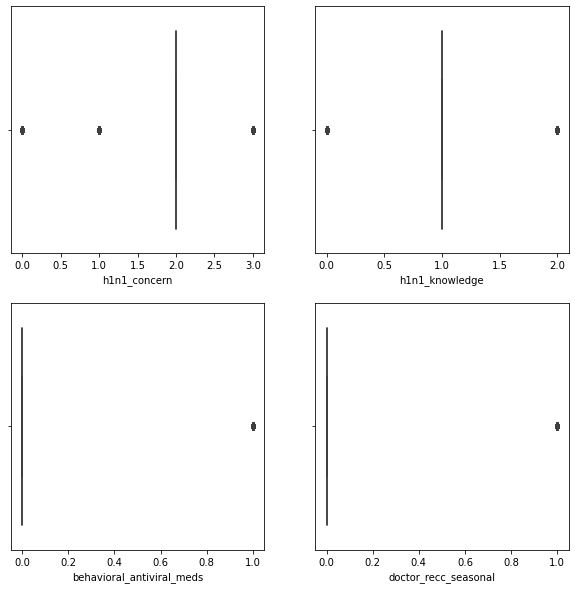

In [21]:
# construct box plot for continuous variables
fig ,ax  =  plt.subplots(2,2, figsize  =(10,10) )
sns.boxplot(x='h1n1_concern', data= data , ax= ax[0,0])
sns.boxplot(x='h1n1_knowledge', data= data , ax= ax[0,1])
sns.boxplot(x='behavioral_antiviral_meds', data= data , ax= ax[1,0])
sns.boxplot(x='doctor_recc_seasonal', data= data , ax= ax[1,1])


### Univariate analysis 

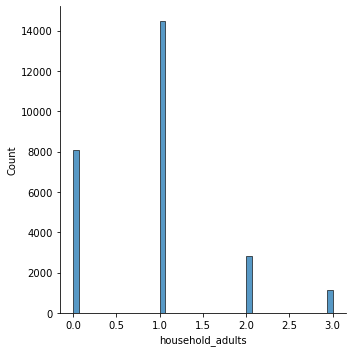

In [22]:
sns.displot(features.household_adults)

Household_adults are mostly 1 and none are 0.5

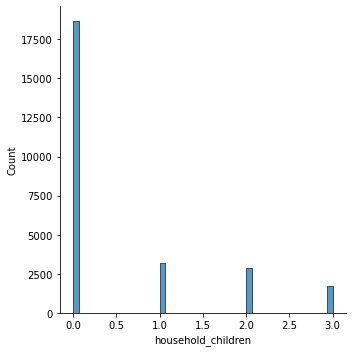

In [23]:
sns.displot(features.household_children)

Similarly household_children are mostly 0 and none for 0.5

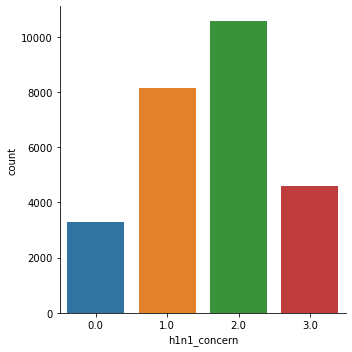

In [24]:
sns.factorplot('h1n1_concern', data = features, kind = "count")

More people are concerned about h1n1

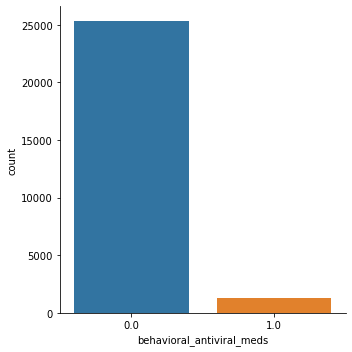

In [25]:
sns.factorplot('behavioral_antiviral_meds', data = features, kind = "count")

almost all people take no behavioral_antiviral_meds

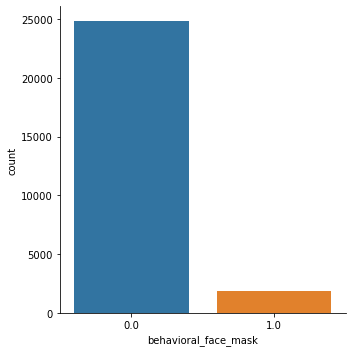

In [26]:
sns.factorplot('behavioral_face_mask', data = features, kind = "count")

Few people use face_mask while other are not using it.

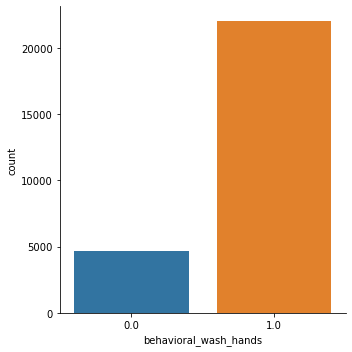

In [28]:
sns.factorplot('behavioral_wash_hands', data = features, kind = "count")

almost 82% people wash_hands

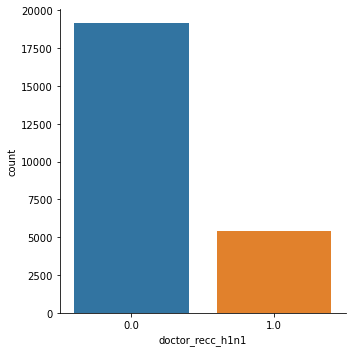

In [29]:
sns.factorplot('doctor_recc_h1n1', data = features, kind = "count")

doctor_recc for h1n1 is only 23%.

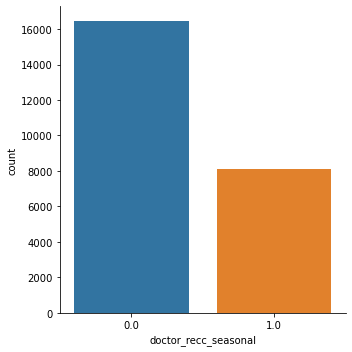

In [30]:
sns.factorplot('doctor_recc_seasonal', data = features, kind = "count")

doctor_recc for seasonal is almost 50%.

### Correlation Plot

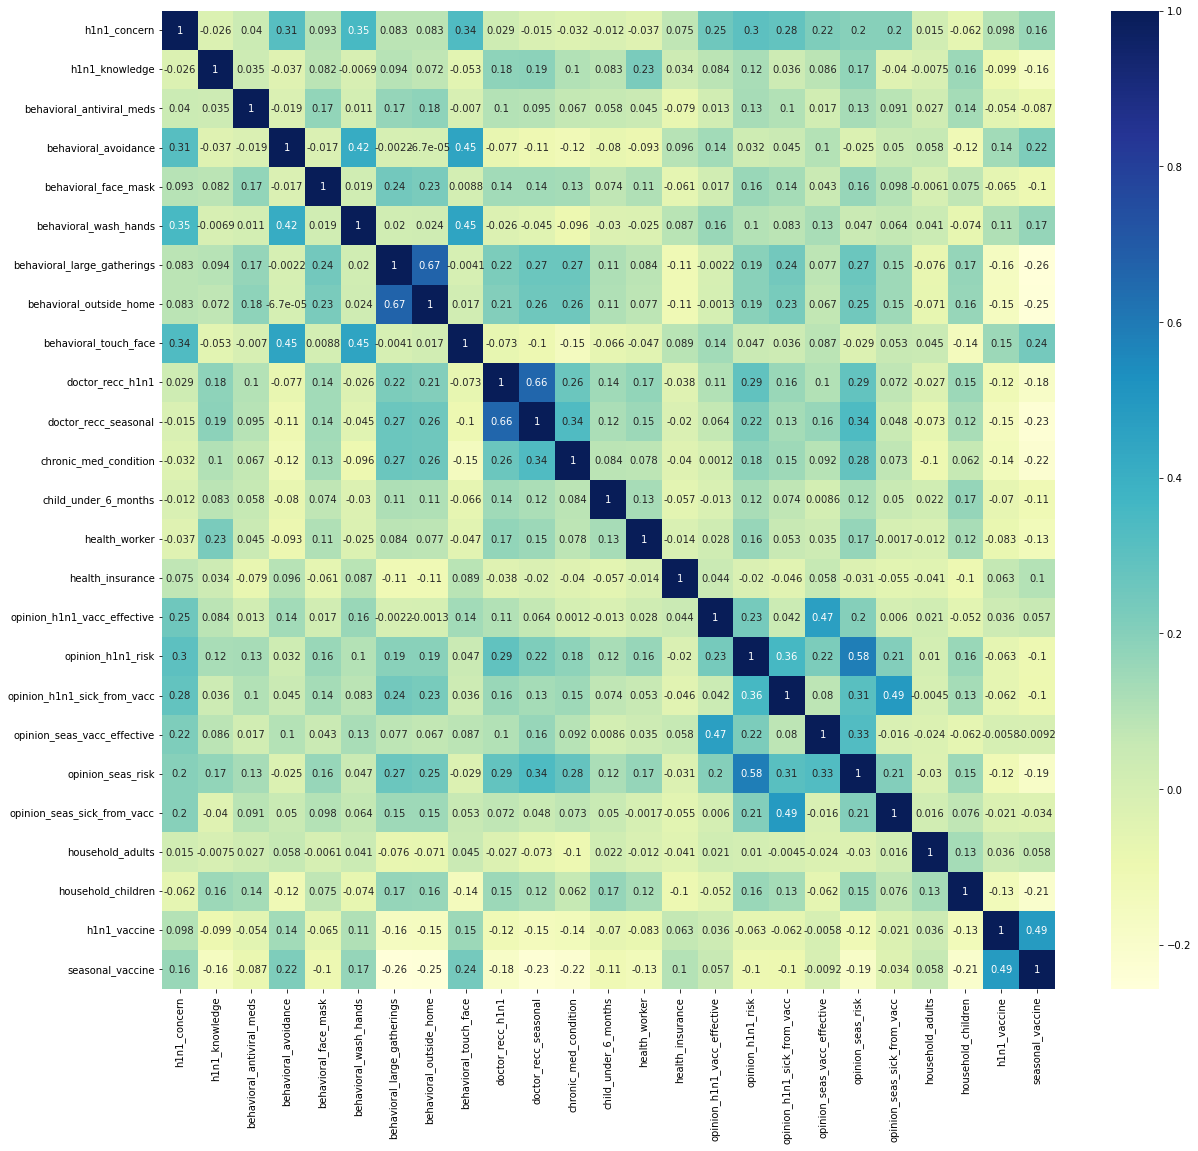

In [31]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), cmap='YlGnBu',annot=True)
plt.show()

As expected, behavioral_outside_home and behavioral_large_gatherings are highly correlated. One of them would be dropped.
Similarly, doctor_recc_h1n1 and doctor_recc_seasonal are highly correlated. One of them would be dropped again.

In [32]:
data.drop(['behavioral_outside_home','doctor_recc_h1n1'], axis = 1,inplace=True)

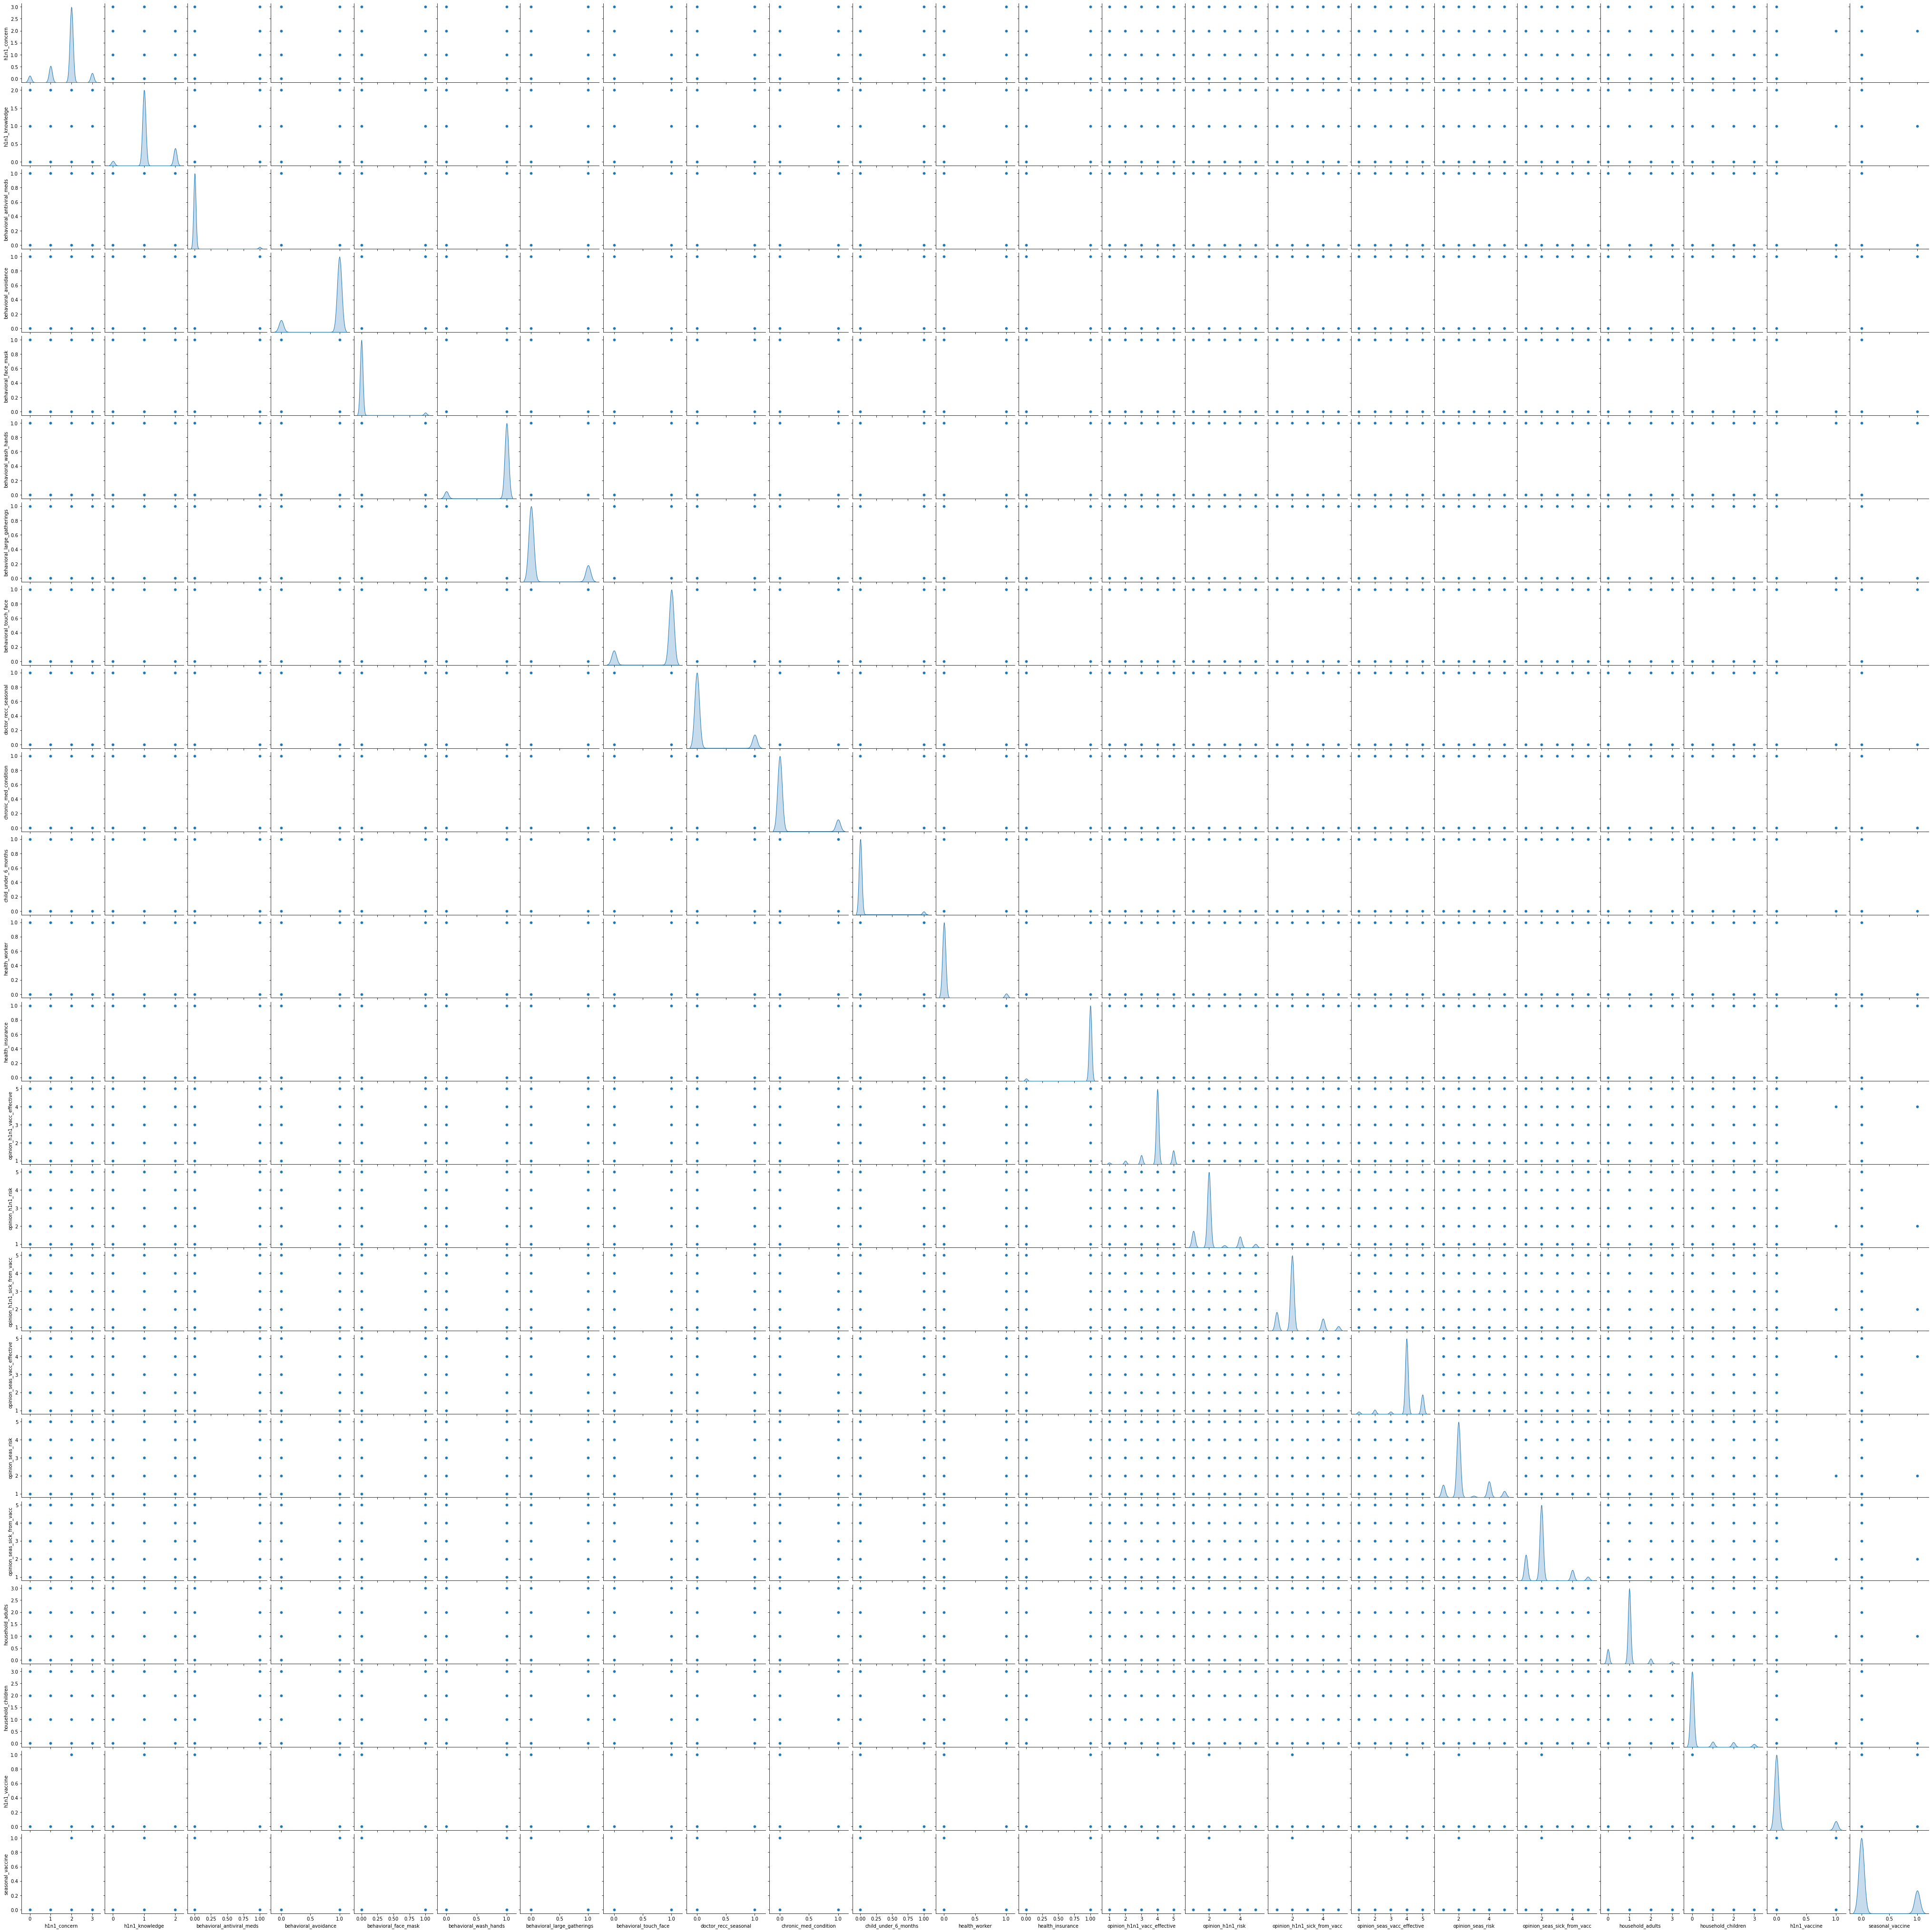

In [33]:
sns.pairplot(data, diag_kind='kde')

### Encoding using Label encoding to the categorical data

In [34]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa'
               ,'employment_industry','employment_occupation']] = data[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa'
               ,'employment_industry','employment_occupation']].apply(enc.fit_transform)

data[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa'
               ,'employment_industry','employment_occupation']]

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,3,1,3,0,2,1,0,1,8,2,4,21
1,1,0,3,1,2,1,1,0,1,0,12,19
2,0,2,3,1,0,1,0,0,9,0,14,21
3,4,0,3,0,2,1,1,1,5,1,4,21
4,2,3,3,0,0,0,0,0,9,0,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...
53409,4,2,3,0,0,0,0,0,6,0,4,21
53410,4,2,3,0,0,0,0,0,6,0,4,21
53411,4,2,3,0,0,0,0,0,6,0,4,21
53412,4,2,3,0,0,0,0,0,6,0,4,21


### Data Distribution

In [35]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,8,2,0.0,0.0,4,21,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,0,1,0,0.0,0.0,12,19,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,9,0,2.0,0.0,14,21,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1,1,5,1,0.0,0.0,4,21,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,9,0,1.0,0.0,18,5,0.0,0.0


### Model Creation

In [36]:
x=data.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1)
y=data[['h1n1_vaccine','seasonal_vaccine']]

### Train-Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100) 
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((42731, 33), (10683, 33), (42731, 2), (10683, 2))

### Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### Multi-label Classification problem 

This problem can be carried out in three different ways as:

1-Binary Relevance
2-Classifier Chains
3-Label Powerset

Because it is a multi-label classification problem.

#### for Solving Multi-Label Classification problems first install separate library scikit-multilearn

In [40]:
!pip install scikit-multilearn

##### 1st Transform our multi-label problem into single-label problem(s)
there are three different ways as:

1-Binary Relevance
2-Classifier Chains
3-Label Powerset

## Binary Relevance

Treats each label as a separate single class classification problem.

In [41]:
from skmultilearn.problem_transform import BinaryRelevance

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
classifier1 = BinaryRelevance(LogisticRegression())
classifier1.fit(X_train_scaled,y_train)
predictions_lr = classifier1.predict(X_test_scaled)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
lr_br=accuracy_score(y_test,predictions_lr)
lr_br

0.743424131798184

### Naive Bayes algorithm

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
classifier2 = BinaryRelevance(GaussianNB())
classifier2.fit(X_train_scaled,y_train)
predictions_nb = classifier2.predict(X_test_scaled)

In [48]:
nb_br= accuracy_score(y_test,predictions_nb)
nb_br

0.583356734999532

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
classifier3 = BinaryRelevance(RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=2))
classifier3.fit(X_train_scaled,y_train)
predictions_rf = classifier3.predict(X_test_scaled)

In [51]:
rf_br= accuracy_score(y_test,predictions_rf)
rf_br

0.7435177384629785

### DecisionTree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
classifier4 = BinaryRelevance(DecisionTreeClassifier())
classifier4.fit(X_train_scaled,y_train)
predictions_dt = classifier4.predict(X_test_scaled)

In [54]:
dt_br= accuracy_score(y_test,predictions_dt)
dt_br

0.7435177384629785

### GradientBoosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
classifier5 = BinaryRelevance(GradientBoostingClassifier())
classifier5.fit(X_train_scaled,y_train)
predictions_gb = classifier5.predict(X_test_scaled)

In [57]:
gb_br= accuracy_score(y_test,predictions_gb)
gb_br

0.7435177384629785

## Classifier Chains

First classifier is trained on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain. It forms chains in order to preserve label correlation.

In [58]:
from skmultilearn.problem_transform import ClassifierChain

### LogisticRegression

In [59]:
chain1 = ClassifierChain(LogisticRegression())
chain1.fit(X_train_scaled,y_train)
predict_lr = chain1.predict(X_test_scaled)

In [60]:
lr_cc= accuracy_score(y_test,predict_lr)
lr_cc

0.743424131798184

### Naive Bayes algorithm

In [61]:
chain2 = ClassifierChain(GaussianNB())
chain2.fit(X_train_scaled, y_train)
predict_nb = chain2.predict(X_test_scaled)

In [62]:
nb_cc= accuracy_score(y_test,predict_nb)
nb_cc

0.583356734999532

## Label Powerset

Problem is transformed into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

In [63]:
from skmultilearn.problem_transform import LabelPowerset

### Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
model = LabelPowerset(GaussianNB())
model.fit(X_train_scaled, y_train)
predictions_nb_ps = model.predict(X_test_scaled)

nb_ps= accuracy_score(y_test,predictions_nb_ps)
nb_ps

0.6419545071609098

## Model Performances

Accuracy score comparison chart

In [66]:
Accuracy_Score = [lr_br,nb_br,rf_br,dt_br,gb_br,lr_cc,nb_cc,nb_ps]
Models = ['Logistic Regression BR', 'Naive Bayes BR' , 'Random Forest BR', 'Decision Tree BR',
          'Gradient Boosting BR', 'Logistic Regression CC', 'Naive Bayes CC', 'Naive Bayes PS']

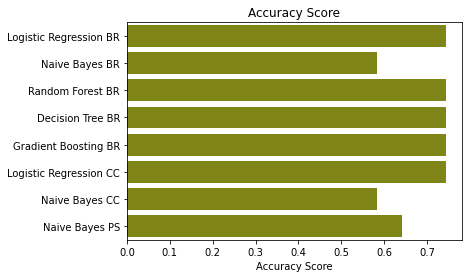

In [67]:
sns.barplot(Accuracy_Score, Models, color="xkcd:baby poop green")
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()